<ul class="breadcrumb">
  <li><a href="1.1.Univaraite_Linear_Mixed_Effects_Model.ipynb">Univariate Basics</a></li>
  <li><a href="1.2.Univariate_Linear_Additive_Genetic_Model.ipynb">Univariate Additive Genetic Model</a></li> 
  <li><a href="1.3.Univariate_Linear_Mixed_Effects_Model_with_Genomic_Data.ipynb">Univariate Genomic Data</a></li>
</ul>

<div class="span5 alert alert-success">
 <font size="5" face="Georgia">Univaraite Linear Mixed Effects Model with Genomic Data</font> 
</div>


<button type="button" class="btn btn-lg btn-primary">Data</button>

In [22]:
using DataFrames,JWAS,JWAS.Datasets

In [2]:
phenofile = Datasets.dataset("testMME","simple.txt")
genofile  = Datasets.dataset("testMME","genotype.txt")
pedfile   = Datasets.dataset("testMME","pedigree.txt");

In [3]:
;cat $phenofile

Animal,Age,y
S1,1,-0.92
D1,2,-1.05
O1,3,-0.92
O3,2,1.2


In [4]:
;cat $genofile

Animal,x1,x2,x3,x4,x5
S1,1,0,1,1,1
D1,2,0,2,2,1
O1,1,2,0,1,0
O3,0,0,2,1,1


In [5]:
;cat $pedfile

S1 0 0
D1 0 0
O1 S1 D1
O2 S1 D1
O3 S1 D1


<button type="button" class="btn btn-lg btn-primary">Build Model</button> 

In [6]:
phenotype = readtable(phenofile,separator = ',',header=true);

In [7]:
pedigree = get_pedigree(pedfile);

Finished!


In [8]:
residual_variance = 1.0
genetic_variance  = 2.5
genetic_variance_by_marker    = 1.5
genetic_variance_by_polygenic = 1.0;

In [9]:
model = build_model("y = intercept + Age + Animal",residual_variance)
set_covariate(model,"Age")
set_random(model,"Animal",pedigree,genetic_variance_by_polygenic)

In [10]:
add_markers(model,genofile,genetic_variance_by_marker,separator=',');

The delimiters in file /Users/haocheng/Github/JWAS.jl/src/5.Datasets/src/../data/testMME/genotype.txt is ,  .


<button type="button" class="btn btn-lg btn-primary">Run Model</button> 

In [17]:
output=runMCMC(model,phenotype,chain_length=5000,
methods="BayesC",Pi=0.9,estimatePi=true,output_samples_frequency=100);

Priors for marker effects covariance matrix were calculated from genetic covariance matrix and π.
Marker effects covariance matrix is 
126.349234.


MCMC Information:
methods                                      BayesC
chain_length                                   5000
estimatePi                                     true
constraint                                    false
missing_phenotypes                            false
starting_value                                false
output_samples_frequency                        100
printout_frequency                             5001

Degree of freedom for hyper-parameters:
residual variances:                           4.000
iid random effect variances:                  4.000
polygenic effect variances:                   4.000
marker effect variances:                      4.000



running MCMC for BayesC...100%|█████████████████████████| Time: 0:00:00


In [18]:
keys(output)

Base.KeyIterator for a Dict{Any,Any} with 6 entries. Keys:
  "Posterior mean of marker effects"
  "MCMC samples for residual variance"
  "MCMC samples for: π"
  "MCMC samples for polygenic effects var-cov parameters"
  "Posterior mean of location parameters"
  "Posterior mean of Pi"

<button type="button" class="btn btn-lg btn-primary">Check Results</button> 

In [19]:
output["Posterior mean of location parameters"]

7x2 Array{Any,2}:
 "1:intercept : intercept"  -0.459423  
 "1:Age : Age"              -0.00503868
 "1:Animal : S1"             0.0231295 
 "1:Animal : D1"             0.00975485
 "1:Animal : O1"            -0.0150733 
 "1:Animal : O3"             0.193806  
 "1:Animal : O2"             0.0219952 

In [20]:
output["Posterior mean of marker effects"]

5x2 Array{Any,2}:
 "x1"  -0.115961 
 "x2"  -0.0403096
 "x3"   0.157725 
 "x4"  -0.16427  
 "x5"  -0.0515051


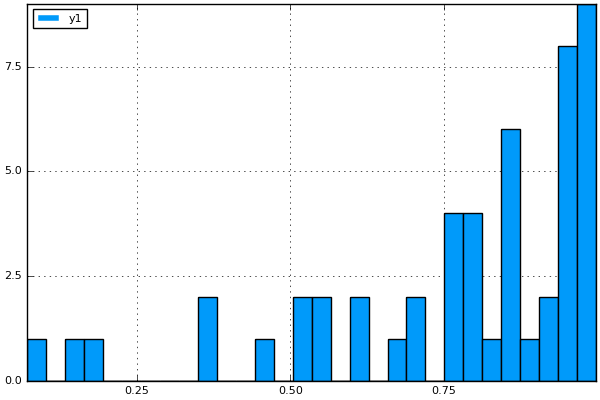

In [21]:
using Plots
histogram(output["MCMC samples for: π"])